# Cast columns to proper types

In [1]:
# import library
import pandas as pd

data = pd.read_csv("data/heart.csv")

data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Insepect each column individually and see there values

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
for col in data.columns:
    print(data[col].value_counts())

54    51
58    42
55    41
56    38
57    38
52    36
59    35
62    35
51    35
53    33
60    32
48    31
61    31
63    30
50    25
41    24
46    24
43    24
64    22
49    21
65    21
47    19
44    19
45    18
42    18
38    16
39    15
67    15
66    13
69    13
40    13
37    11
35    11
68    10
70     7
74     7
34     7
36     6
71     5
32     5
72     4
75     3
29     3
31     2
77     2
33     2
76     2
30     1
73     1
28     1
Name: Age, dtype: int64
M    725
F    193
Name: Sex, dtype: int64
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
120    132
130    118
140    107
110     58
150     55
      ... 
113      1
164      1
117      1
127      1
0        1
Name: RestingBP, Length: 67, dtype: int64
0      172
254     11
223     10
220     10
230      9
      ... 
355      1
354      1
353      1
349      1
603      1
Name: Cholesterol, Length: 222, dtype: int64
0    704
1    214
Name: FastingBS, dtype: int64
Normal    552
LVH       188
S

AGE: 
* the dtype seems correct which is int64. 
* The ages dont seem ridiculous so it seems fine.

SEX:
* The dtype is in string format. 
* Need to cast the Males to 1 and Females to 0 to make it a binary category

ChestPainType: 
* The dtype is an object which suggests that the pain types are string 
* Create a mapping for the pain types and encode them since its a categorical column.
* If there ranked we need to respect that ranking 

RestingBP:
* The dtype is int64 which indicates its as expected. 
* This column is in mmHg which is not the same scale as the other numeric columns so it needs to be normalized
* There seems to be 1 value that is 0 mmHg which would indicate that the person would be dead so this must be a mistake. 
    * Drop that row.

Cholesterol:
* The dtype is int64 which indicates its as expected. 
* This column is in mm/dL which is not the same scale as the other numeric columns so it needs to be normalized
* It seems that we have concentrations as zero 172 times. Thats about 10 percent of the entire dataset. 
    * Even healthy people have some level of cholesterol so we should impute this value with the median so we can conserve those rows.

FastingBS:
* The dtpe is int64 which indicates its as expected as it is a binary category

RestingECG:
* Has three categories in string format. Which matched the dtype object. 
* Cast this column to numeric values. 
* This numeric values do not have to be ranked. 

MaxHR:
* Its as expeted which is a dtype of integer. Its simply the max heart rate acheived. 
* We need to normalize this column 

ExerciseAngina:
* Has a dtype of object which suggests its categorical which it is. 
* It should be binary 
    * We need to cast N = 0 (No), Y = 1 (Yes)

OldPeak: 
* The old peak is a cardiac stress test from the S to T wave. It represents the magnitude of ST segment depression during a cardiac stress test. This is also known as the 'depression' or 'depolarization' phase on the ECG waveform. Changes in the ST segment can indicate various cardiac conditions.
* It makes sense that the dtype = float. 
* We need to normalize this column

ST_Slope:
* Has the object dtype and has three categories. 
* Its a continuation of the OldPeak column except this time it simply labels it as Flat, Up, Down

HeartDisease: (Target)
* Its binary and integer based as expected

Lets begin by label encoding the following columns: 
* Sex
* ChestPainType
* ExcerciseAngina
* ST_Slope


In [9]:
"""
We have two binary columns that can be encoded using LabelEncoder. Those columns would be Sex and ExcerciseAngina
"""

# import label encoder
from sklearn.preprocessing import LabelEncoder

# Instantiate the encoder
le = LabelEncoder()

# Perform the numeric encoding
data['Sex'] = le.fit_transform(data['Sex'])
data['ExerciseAngina'] = le.fit_transform(data['ExerciseAngina'])

In [10]:
data['Sex'].value_counts()

1    725
0    193
Name: Sex, dtype: int64

In [11]:
data['ExerciseAngina'].value_counts()

0    547
1    371
Name: ExerciseAngina, dtype: int64

Next we need to encode the nominal column for Chest Pain type

In [12]:
# Define an ordinal mapping dictionary for chest pain
chest_mapping = {'ASY': 0, 'NAP': 1, 'ATA': 2, 'TA': 3}
# Define an ordinal mapping dictionary for Slope
slope_mapping = {'Flat': 0, 'Down': 1, 'Up': 2}
# Apply ordinal encoding to the columns
data['ChestPainType'] = data['ChestPainType'].map(chest_mapping)
data['ST_Slope'] = data['ST_Slope'].map(slope_mapping)

In [13]:
data['ChestPainType'].value_counts()

0    496
1    203
2    173
3     46
Name: ChestPainType, dtype: int64

In [14]:
data['ST_Slope'].value_counts()

0    460
2    395
1     63
Name: ST_Slope, dtype: int64

# Clean numeric columns 

Determine any outliers in our numeric columns

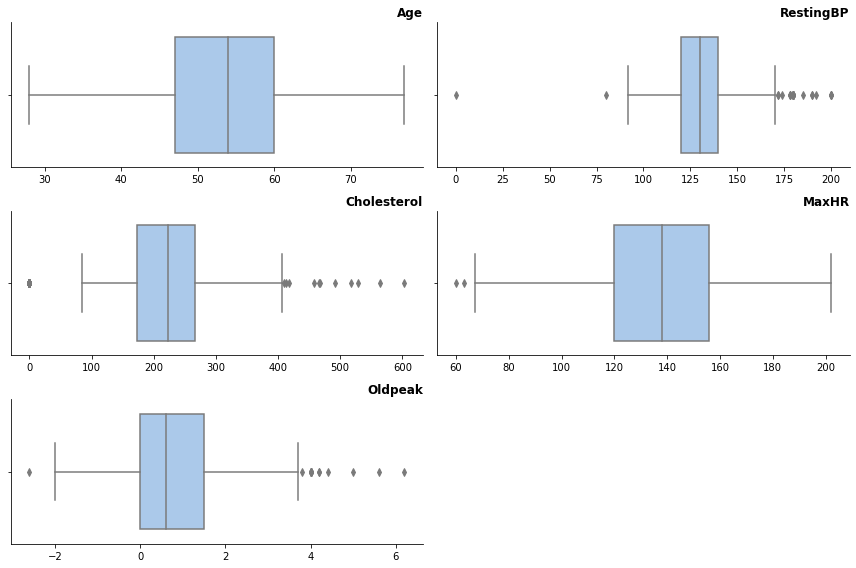

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# subset our numeric data
num = 'Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'

# Determine the number of rows and columns in the subplot grid
num_rows = (len(num) + 1) // 2  # Calculate the number of rows (round up)
num_cols = 2  # Fixed number of columns

# Create the subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Flatten the axes array to handle varying numbers of subplots
axes = axes.ravel()

# Develop Boxplots to see outliers
for idx, col in enumerate(num):
    ax = axes[idx]
    sns.boxplot(x=col,data=data,palette='pastel', ax=ax)
    ax.set_ylabel('') 
    ax.spines['top'].set_visible(False), 
    ax.set_xlabel('')
    ax.spines['right'].set_visible(False)
    ax.set_title(
        f'{col}',
        loc='right', 
        weight='bold', 
        fontsize=12
    )

# Hide any unused subplots
for i in range(len(num), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

The main consideration is if any of the values here are possible to obtain and if they are then we should consider keeping them. 

Age: 
* As long as we are under 100 or close to it then its fine. 
* This proves to be true so we keep all ages

Resting BP: 
* There are outliers however we need to consider the patients themselves. Its possible to have low resting BP because of [Hypotension](https://www.mayoclinic.org/diseases-conditions/low-blood-pressure/symptoms-causes/syc-20355465). 
    * Anything below 90 mmHg is consider Hypotension. So this mean that 78 mmHg is considered possible. 
    * There is one value that is zero which doesn't make sense so lets drop this row

Cholesterol: 
* The [ranges](https://www.mayoclinic.org/tests-procedures/cholesterol-test/about/pac-20384601) for cholesterol suggest that the only impossible level is the 0 mg/dL value.
* Drop that row

MaxHR: 
* Should keep all of it. All the listed Heart Rates are possible

Old Peak:
* All values are possible


In [19]:
import numpy as np
# Replace all zeros in RestingBP with NaN
data['RestingBP'] = data['RestingBP'].replace(0, np.nan)
data['Cholesterol'] = data['Cholesterol'].replace(0, np.nan)

# Drop that NaN value row wise
data['RestingBP'].dropna(axis=0, inplace=True)
data['Cholesterol'].dropna(axis=0, inplace=True)

# Explore

Lets view a heatmap of the numeric columns and the target

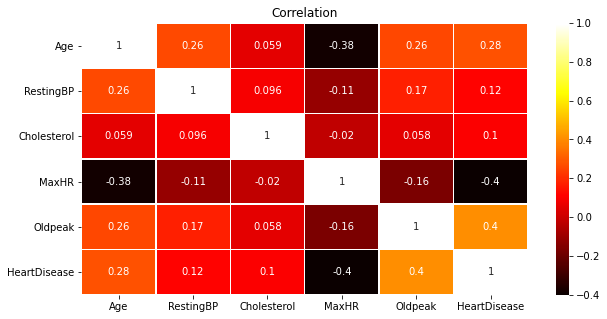

In [30]:
def correlation_heatmap(df: pd.core.frame.DataFrame, subset: list, target: str, title_name: str='Correlation'):
    # Include the target variable in the list of columns to display in the heatmap
    subset.append(target)
    # Subset the DataFrame to include only the selected columns
    subset_df = df[subset]
    corr = subset_df.corr()
    plt.figure(figsize=(10,5))
    sns.heatmap(corr, linewidths=.5, cmap='hot', annot=True)
    plt.title(title_name)
    plt.show()

numeric = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
correlation_heatmap(data, numeric, 'HeartDisease', 'Correlation')

We can see how Old Peak has the most correlation with Heart Disease. Max HR has the highest negative correlation. The other columns are not that high 

Lets look at the distribution of the features and target

In [31]:
def plot_column_distributions(df: pd.DataFrame):
    # Set the number of columns per row in the subplots
    columns_per_row = 3

    # Calculate the number of rows needed for subplots
    num_rows = (len(df.columns) + columns_per_row - 1) // columns_per_row

    # Create subplots
    fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(15, 5 * num_rows))
    axes = axes.ravel()

    for i, column in enumerate(df.columns):
        # Plot the histogram for each numeric column
        sns.histplot(data=df, x=column, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')

    # Remove any empty subplots
    for j in range(len(df.columns), num_rows * columns_per_row):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

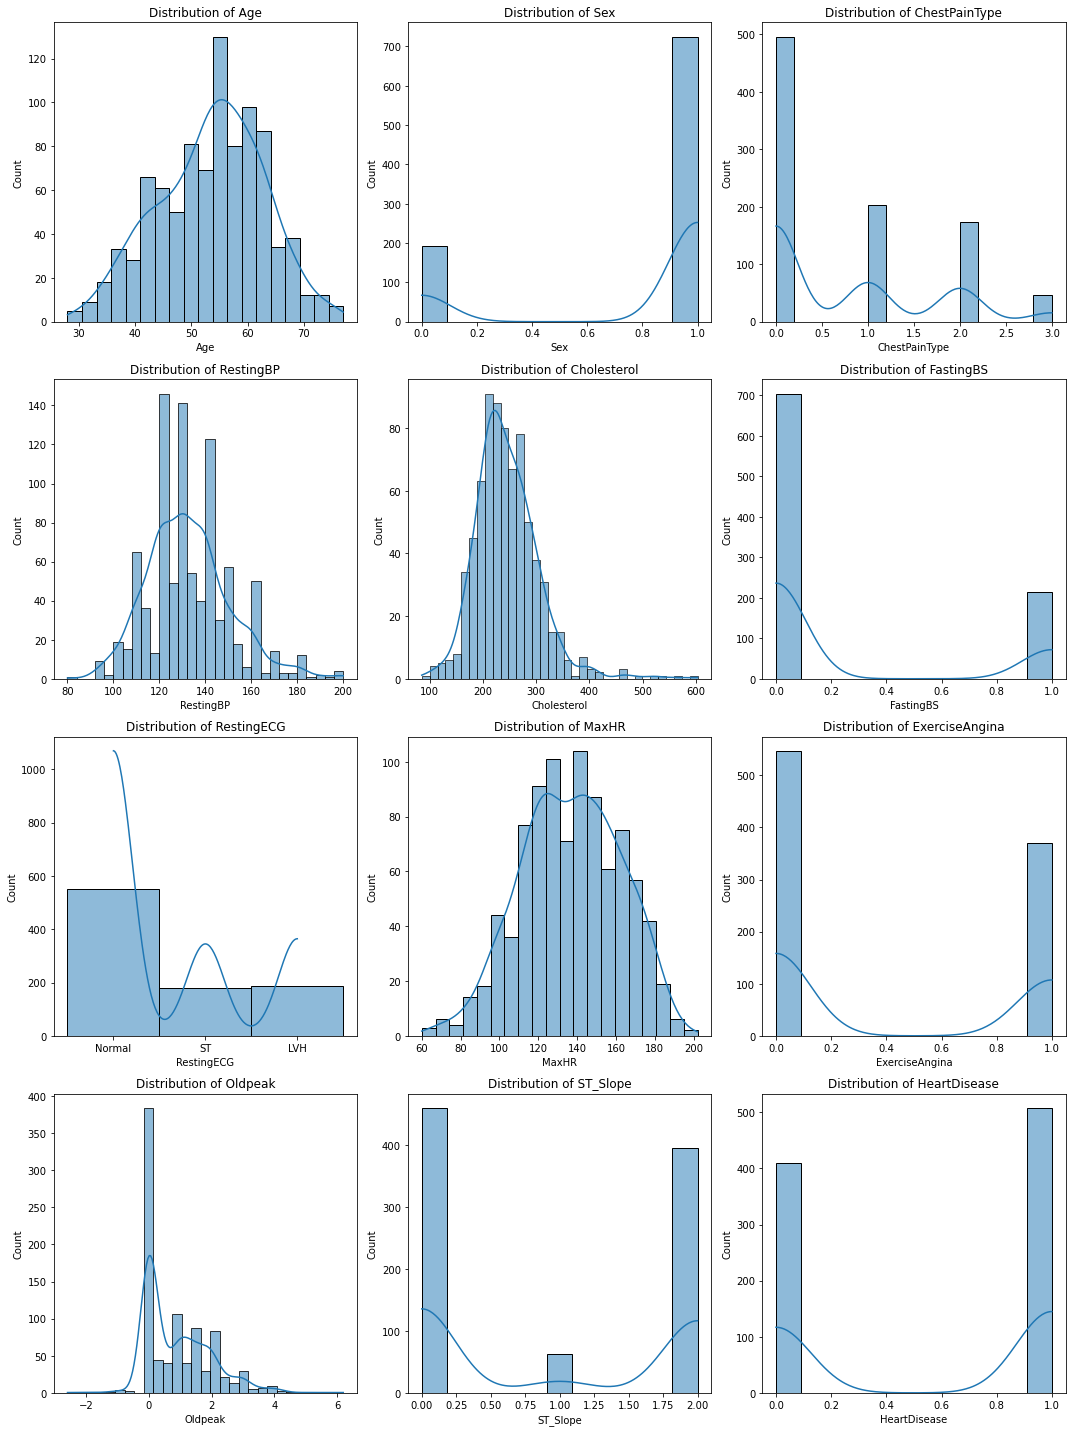

In [32]:
plot_column_distributions(data)

On the bright side our Target is balanced. Its almost 50-50. As mentioned before the numeric columns need to scaled. This should be perfomed after train test split to avoid data leakage.